In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
base_path = ''

In [2]:
df = pd.read_csv(base_path + 'pmart.csv')
df

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday
0,2022-04-04,13407001112,매직스폰지대,1,2200,2200,4,0
1,2022-04-14,13407001112,매직스폰지대,2,2200,4400,4,3
2,2022-05-14,13407001112,매직스폰지대,1,2200,2200,5,5
3,2022-05-20,13407001112,매직스폰지대,1,2200,2200,5,4
4,2022-06-04,13407001112,매직스폰지대,1,2200,2200,6,5
...,...,...,...,...,...,...,...,...
416307,2022-05-04,9334214017686,시저연어와쇠고기1Kg,1,9900,9900,5,2
416308,2022-08-29,9334214017686,시저연어와쇠고기1Kg,1,9900,9900,8,0
416309,2022-09-06,9334214017686,시저연어와쇠고기1Kg,1,9900,9900,9,1
416310,2022-09-16,9334214017686,시저연어와쇠고기1Kg,1,9900,9900,9,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416312 entries, 0 to 416311
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   SAL_DT    416312 non-null  object
 1   PLU_CD    416312 non-null  int64 
 2   GDS_NM    416312 non-null  object
 3   SALE_QTY  416312 non-null  int64 
 4   SALE_PRC  416312 non-null  int64 
 5   SALE_AMT  416312 non-null  int64 
 6   month     416312 non-null  int64 
 7   weekday   416312 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 25.4+ MB


In [4]:
df['weekday'].value_counts()

5    72979
4    70749
1    68749
2    68478
3    68293
0    66530
6      534
Name: weekday, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416312 entries, 0 to 416311
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   SAL_DT    416312 non-null  object
 1   PLU_CD    416312 non-null  int64 
 2   GDS_NM    416312 non-null  object
 3   SALE_QTY  416312 non-null  int64 
 4   SALE_PRC  416312 non-null  int64 
 5   SALE_AMT  416312 non-null  int64 
 6   month     416312 non-null  int64 
 7   weekday   416312 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 25.4+ MB


In [6]:
df = df.drop(df[df.SALE_AMT==0].index)

In [7]:
q1=df['SALE_AMT'].quantile(0.25)
q2=df['SALE_AMT'].quantile(0.5)
q3=df['SALE_AMT'].quantile(0.75)
iqr=q3-q1

In [8]:
condition=df['SALE_AMT']>q3+1.5*iqr
df[condition]

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday
45,2022-04-18,200000,완숙토마토,1,19000,19000,4,0
84,2022-05-06,200000,완숙토마토,2,5800,11600,5,4
199,2022-06-29,200000,완숙토마토,1,26000,26000,6,2
258,2022-07-28,200000,완숙토마토,1,29000,29000,7,3
268,2022-08-06,200000,완숙토마토,2,6000,12000,8,5
...,...,...,...,...,...,...,...,...
416213,2022-06-11,8888021203578,에너자이저맥스,1,11500,11500,6,5
416214,2022-06-29,8888021203578,에너자이저맥스,1,11500,11500,6,2
416215,2022-06-29,8888021203578,에너자이저맥스,1,11500,11500,6,2
416216,2022-07-28,8888021203578,에너자이저맥스,1,11500,11500,7,3


In [9]:
a=df[condition].index
df.drop(a,inplace=True)

In [10]:
drap = df[df['GDS_NM'].str.contains('재사용')].index
df.drop(drap, inplace=True)

In [11]:
drap = df[df['GDS_NM'].str.contains('배달봉투')].index
df.drop(drap, inplace=True)

In [12]:
drap = df[df['GDS_NM'].str.contains('종량제')].index
df.drop(drap, inplace=True)

In [13]:
drap = df[df['GDS_NM'].str.contains('음식물')].index
df.drop(drap, inplace=True)

In [14]:
drap = df[df['GDS_NM'].str.contains('소주공병')].index
df.drop(drap, inplace=True)

In [15]:
drap = df[df['GDS_NM'].str.contains('배송비')].index
df.drop(drap, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369129 entries, 0 to 416311
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   SAL_DT    369129 non-null  object
 1   PLU_CD    369129 non-null  int64 
 2   GDS_NM    369129 non-null  object
 3   SALE_QTY  369129 non-null  int64 
 4   SALE_PRC  369129 non-null  int64 
 5   SALE_AMT  369129 non-null  int64 
 6   month     369129 non-null  int64 
 7   weekday   369129 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 25.3+ MB


In [17]:
df

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday
0,2022-04-04,13407001112,매직스폰지대,1,2200,2200,4,0
1,2022-04-14,13407001112,매직스폰지대,2,2200,4400,4,3
2,2022-05-14,13407001112,매직스폰지대,1,2200,2200,5,5
3,2022-05-20,13407001112,매직스폰지대,1,2200,2200,5,4
4,2022-06-04,13407001112,매직스폰지대,1,2200,2200,6,5
...,...,...,...,...,...,...,...,...
416307,2022-05-04,9334214017686,시저연어와쇠고기1Kg,1,9900,9900,5,2
416308,2022-08-29,9334214017686,시저연어와쇠고기1Kg,1,9900,9900,8,0
416309,2022-09-06,9334214017686,시저연어와쇠고기1Kg,1,9900,9900,9,1
416310,2022-09-16,9334214017686,시저연어와쇠고기1Kg,1,9900,9900,9,4


In [18]:
dfm = df[['PLU_CD', 'GDS_NM', 'month', 'SALE_QTY', 'SALE_AMT']]

In [19]:
dfm['month'].value_counts()

8    62591
5    60433
4    58665
6    57747
7    57528
9    56388
3    15777
Name: month, dtype: int64

In [20]:
dfm.isnull().sum()

PLU_CD      0
GDS_NM      0
month       0
SALE_QTY    0
SALE_AMT    0
dtype: int64

# 3 4 5 6 7 8 9 월만있음

In [21]:
dfm3 = dfm.query('month == 3')
dfm4 = dfm.query('month == 4')
dfm5 = dfm.query('month == 5')
dfm6 = dfm.query('month == 6')
dfm7 = dfm.query('month == 7')
dfm8 = dfm.query('month == 8')
dfm9 = dfm.query('month == 9')

In [22]:
dfm3_1 = dfm3.groupby(['GDS_NM', 'month']).sum()
dfm4_1 = dfm4.groupby(['GDS_NM', 'month']).sum()
dfm5_1 = dfm5.groupby(['GDS_NM', 'month']).sum()
dfm6_1 = dfm6.groupby(['GDS_NM', 'month']).sum()
dfm7_1 = dfm7.groupby(['GDS_NM', 'month']).sum()
dfm8_1 = dfm8.groupby(['GDS_NM', 'month']).sum()
dfm9_1 = dfm9.groupby(['GDS_NM', 'month']).sum()

In [23]:
dfm3_2 = dfm3_1.reset_index()
dfm4_2 = dfm4_1.reset_index()
dfm5_2 = dfm5_1.reset_index()
dfm6_2 = dfm6_1.reset_index()
dfm7_2 = dfm7_1.reset_index()
dfm8_2 = dfm8_1.reset_index()
dfm9_2 = dfm9_1.reset_index()

In [24]:
dfm3_3 = dfm3_2[['GDS_NM', 'SALE_QTY']]
dfm4_3 = dfm4_2[['GDS_NM', 'SALE_QTY']]
dfm5_3 = dfm5_2[['GDS_NM', 'SALE_QTY']]
dfm6_3 = dfm6_2[['GDS_NM', 'SALE_QTY']]
dfm7_3 = dfm7_2[['GDS_NM', 'SALE_QTY']]
dfm8_3 = dfm8_2[['GDS_NM', 'SALE_QTY']]
dfm9_3 = dfm9_2[['GDS_NM', 'SALE_QTY']]

In [25]:
dfm3_4 = dfm3_2[['GDS_NM', 'SALE_AMT']]
dfm4_4 = dfm4_2[['GDS_NM', 'SALE_AMT']]
dfm5_4 = dfm5_2[['GDS_NM', 'SALE_AMT']]
dfm6_4 = dfm6_2[['GDS_NM', 'SALE_AMT']]
dfm7_4 = dfm7_2[['GDS_NM', 'SALE_AMT']]
dfm8_4 = dfm8_2[['GDS_NM', 'SALE_AMT']]
dfm9_4 = dfm9_2[['GDS_NM', 'SALE_AMT']]

In [26]:
dfm3_5 = dfm3_3.sort_values('SALE_QTY', ascending=False).head(50)
dfm4_5 = dfm4_3.sort_values('SALE_QTY', ascending=False).head(50)
dfm5_5 = dfm5_3.sort_values('SALE_QTY', ascending=False).head(50)
dfm6_5 = dfm6_3.sort_values('SALE_QTY', ascending=False).head(50)
dfm7_5 = dfm7_3.sort_values('SALE_QTY', ascending=False).head(50)
dfm8_5 = dfm8_3.sort_values('SALE_QTY', ascending=False).head(50)
dfm9_5 = dfm9_3.sort_values('SALE_QTY', ascending=False).head(50)

In [27]:
dfm3_6 = dfm3_4.sort_values('SALE_AMT', ascending=False).head(50)
dfm4_6 = dfm4_4.sort_values('SALE_AMT', ascending=False).head(50)
dfm5_6 = dfm5_4.sort_values('SALE_AMT', ascending=False).head(50)
dfm6_6 = dfm6_4.sort_values('SALE_AMT', ascending=False).head(50)
dfm7_6 = dfm7_4.sort_values('SALE_AMT', ascending=False).head(50)
dfm8_6 = dfm8_4.sort_values('SALE_AMT', ascending=False).head(50)
dfm9_6 = dfm9_4.sort_values('SALE_AMT', ascending=False).head(50)

In [28]:
plt.rcParams['font.family'] = 'NanumGothic'

# Month QTY

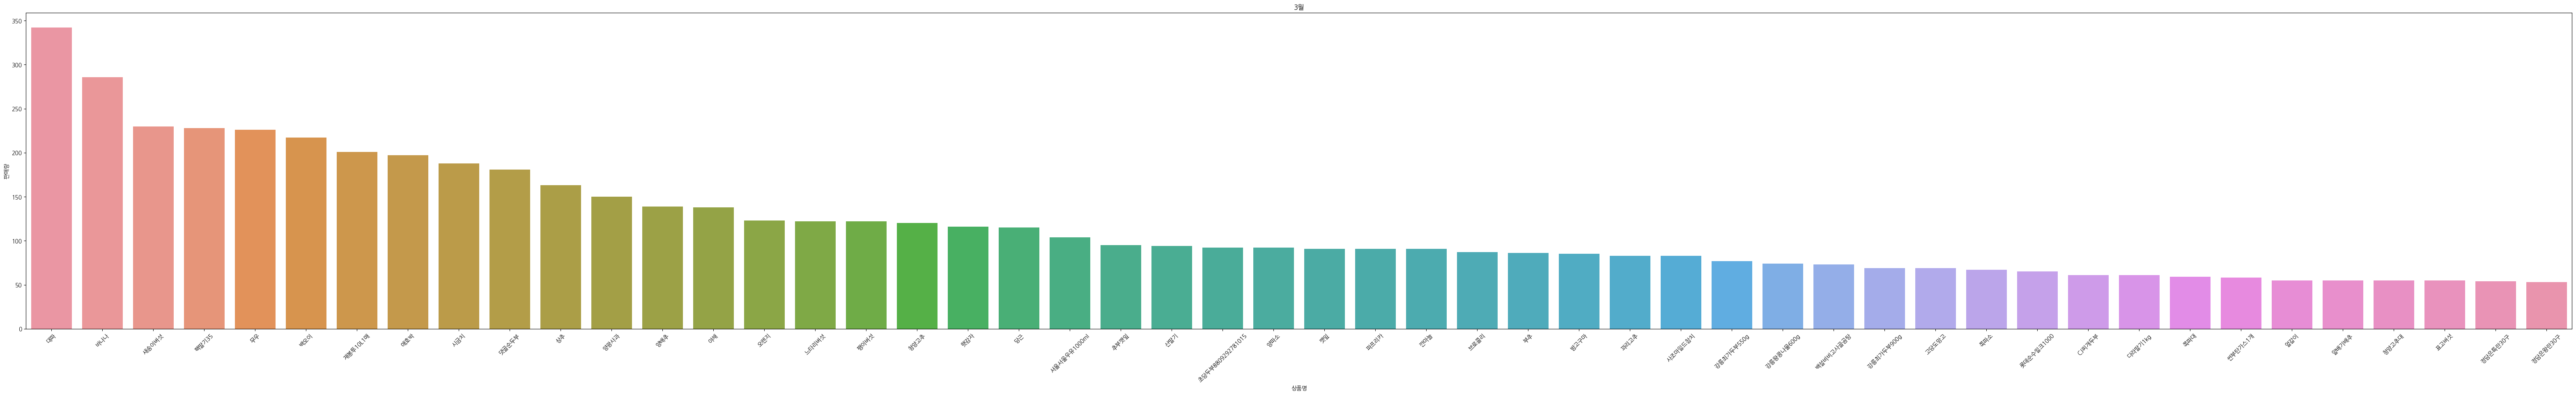

In [29]:
plt.figure(figsize=(80, 10))
plt.title('3월')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfm3_5, x='GDS_NM', y='SALE_QTY')
plt.xlabel('상품명')
plt.ylabel('판매량')
plt.show()

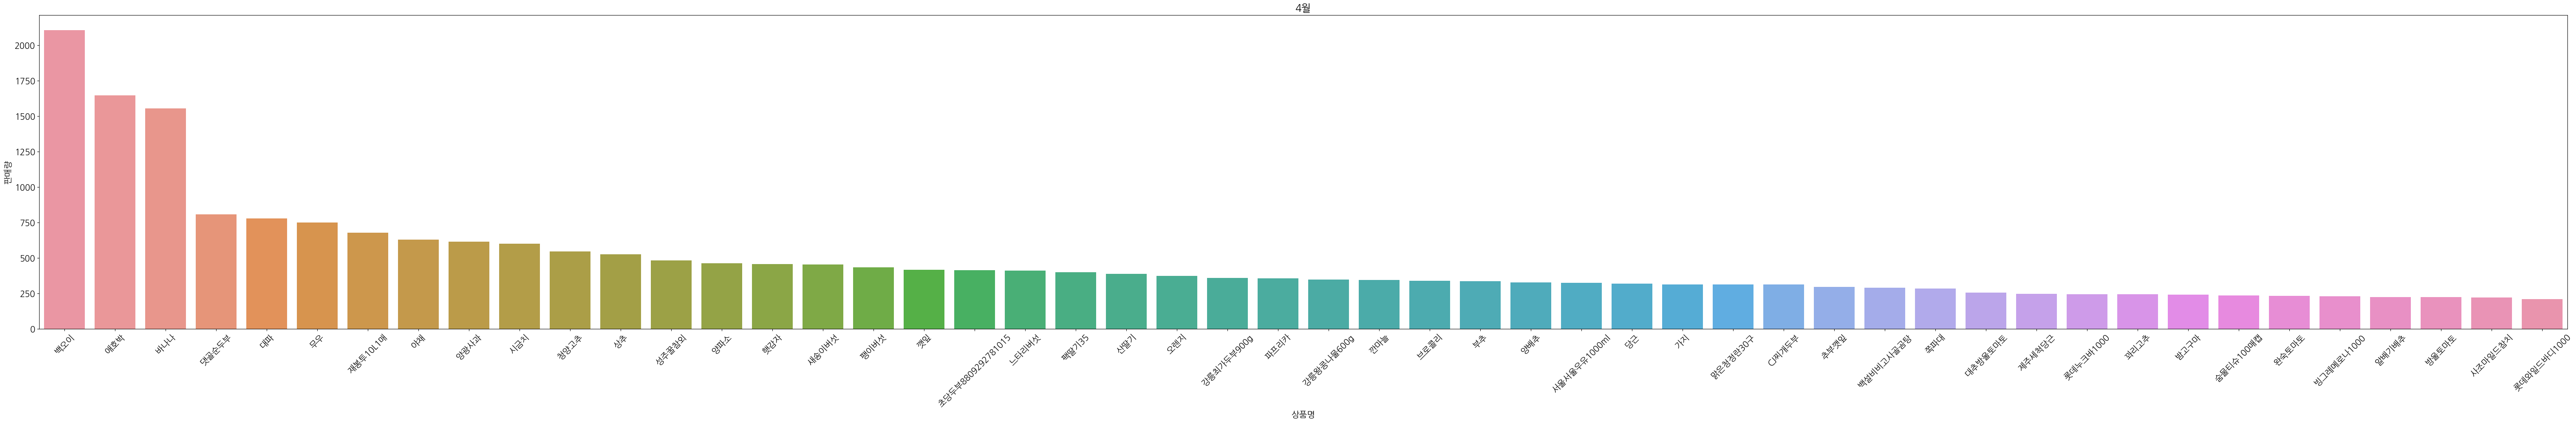

In [30]:
plt.figure(figsize=(80, 10))
plt.title('4월')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfm4_5, x='GDS_NM', y='SALE_QTY')
plt.xlabel('상품명')
plt.ylabel('판매량')
plt.show()

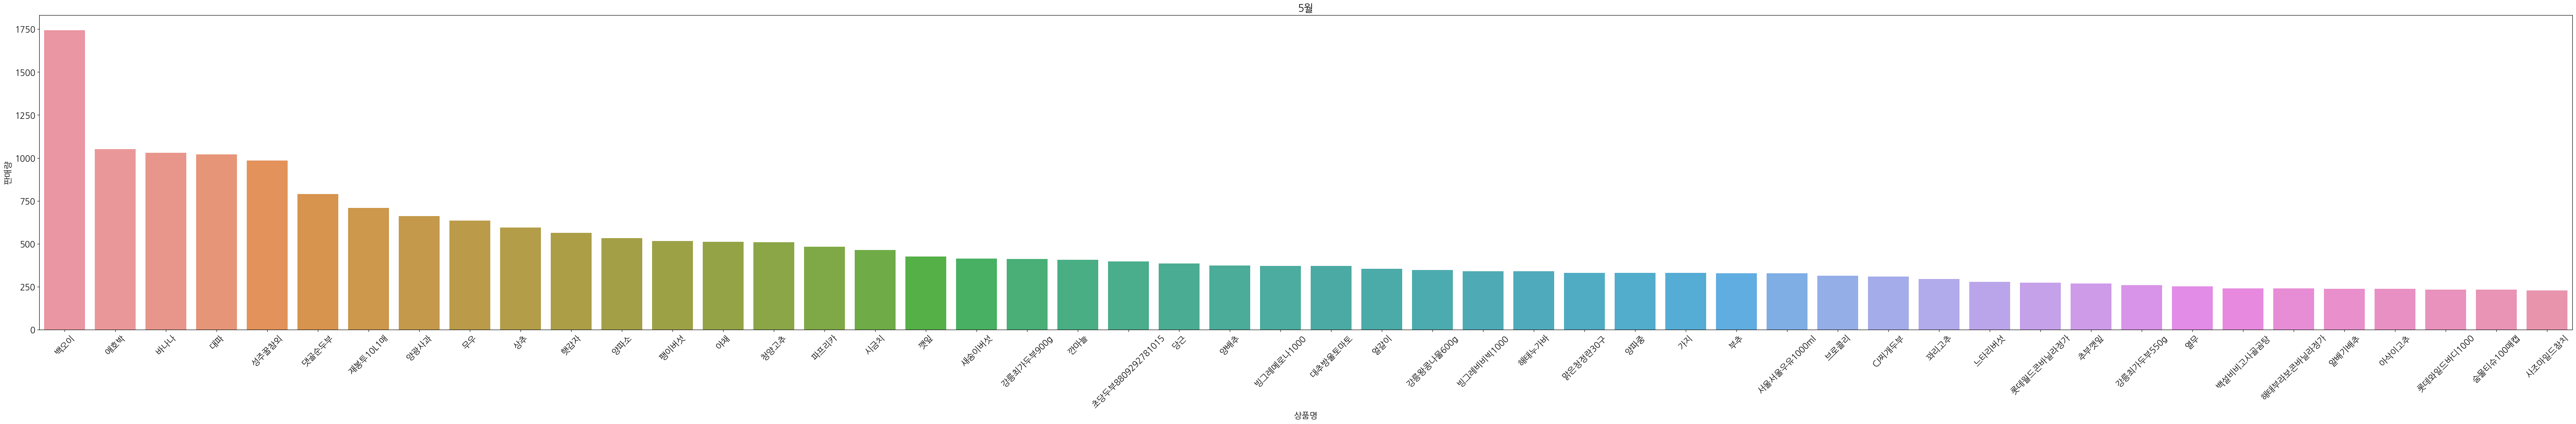

In [31]:
plt.figure(figsize=(80, 10))
plt.title('5월')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfm5_5, x='GDS_NM', y='SALE_QTY')
plt.xlabel('상품명')
plt.ylabel('판매량')
plt.show()

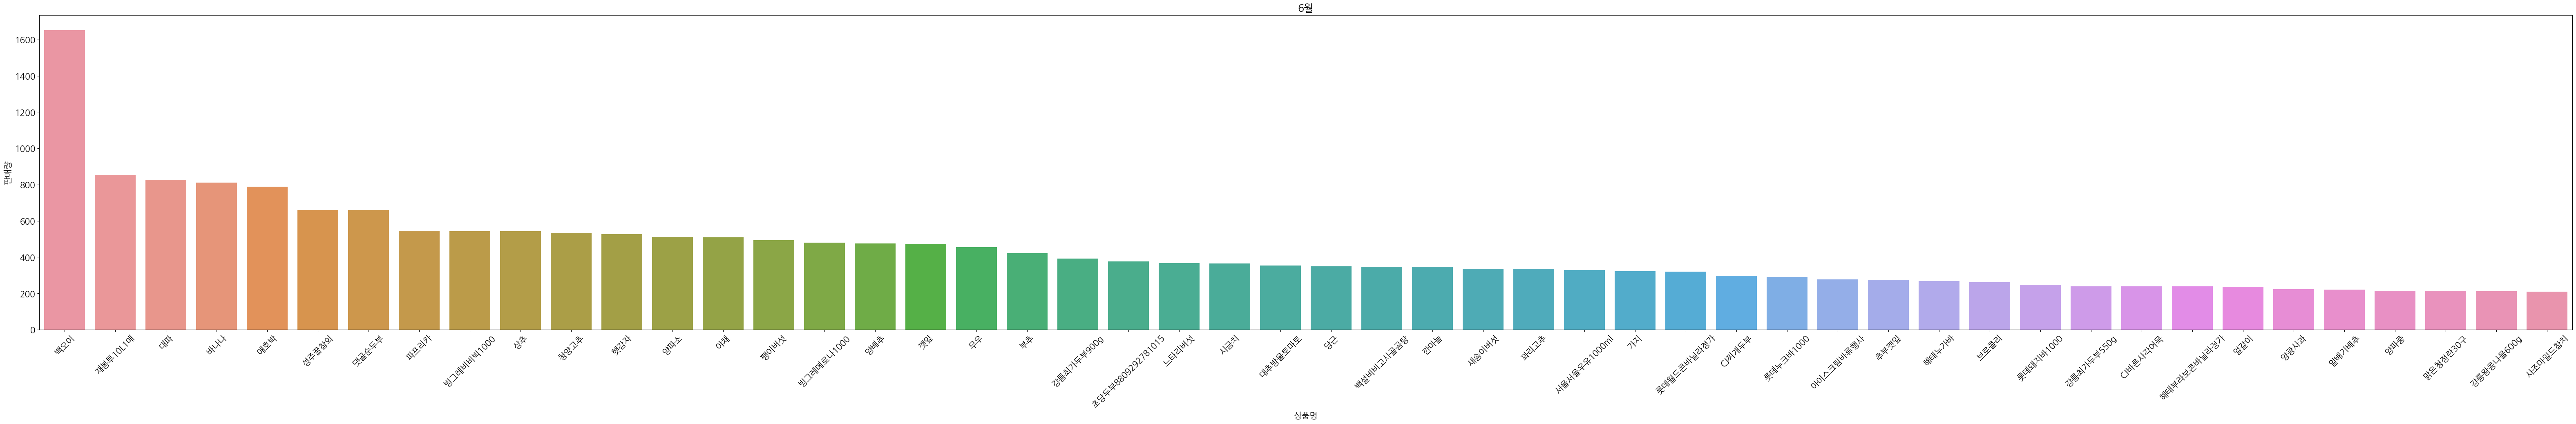

In [32]:
plt.figure(figsize=(80, 10))
plt.title('6월')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfm6_5, x='GDS_NM', y='SALE_QTY')
plt.xlabel('상품명')
plt.ylabel('판매량')
plt.show()

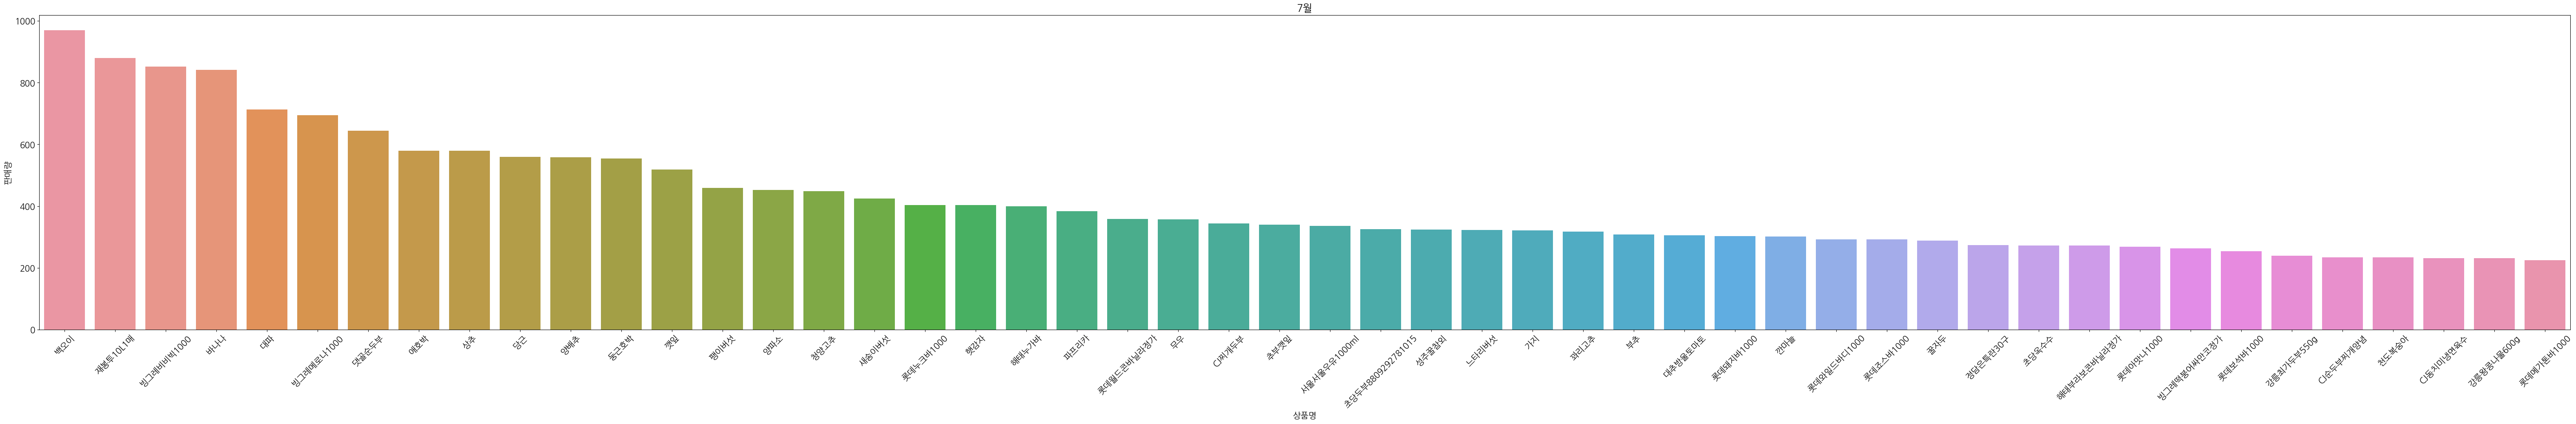

In [33]:
plt.figure(figsize=(80, 10))
plt.title('7월')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfm7_5, x='GDS_NM', y='SALE_QTY')
plt.xlabel('상품명')
plt.ylabel('판매량')
plt.show()

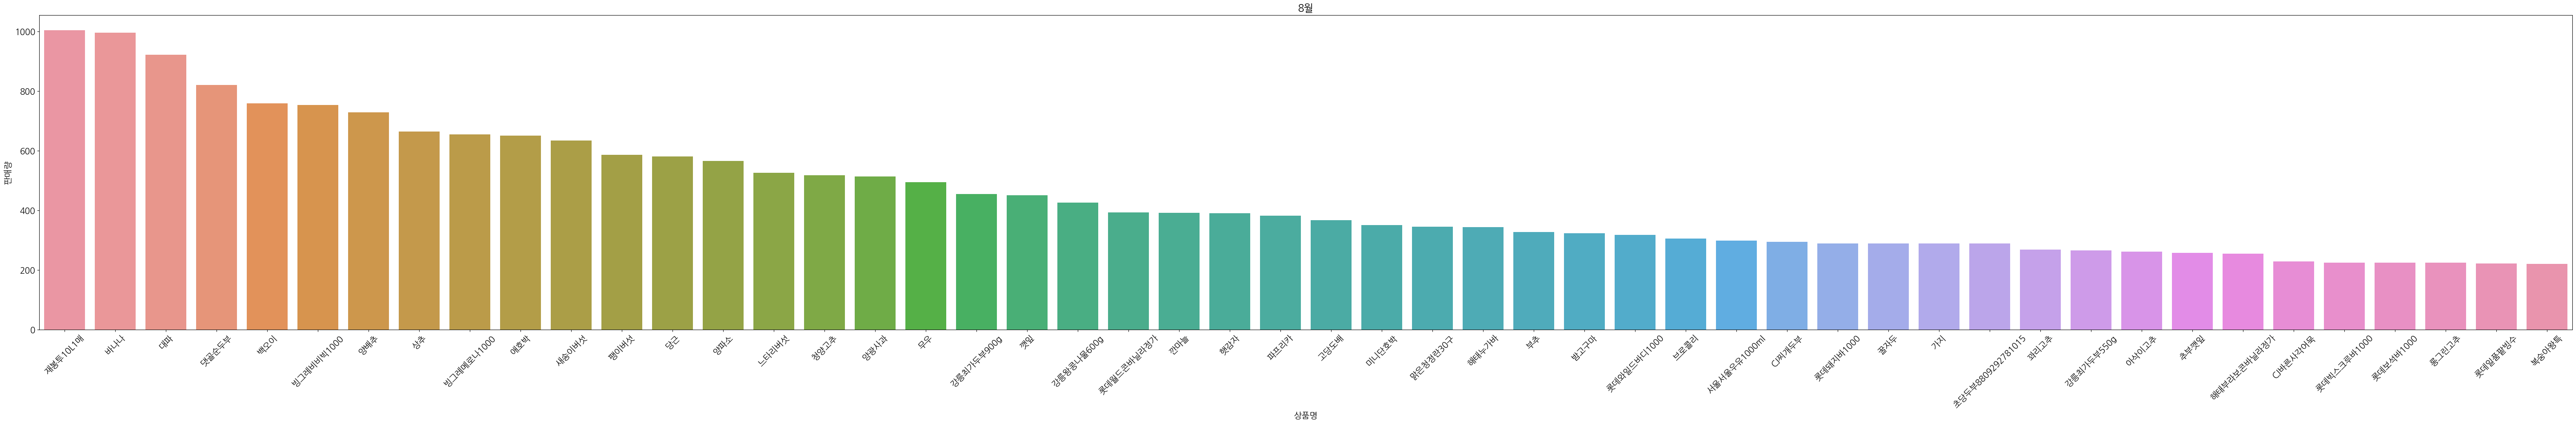

In [34]:
plt.figure(figsize=(80, 10))
plt.title('8월')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfm8_5, x='GDS_NM', y='SALE_QTY')
plt.xlabel('상품명')
plt.ylabel('판매량')
plt.show()

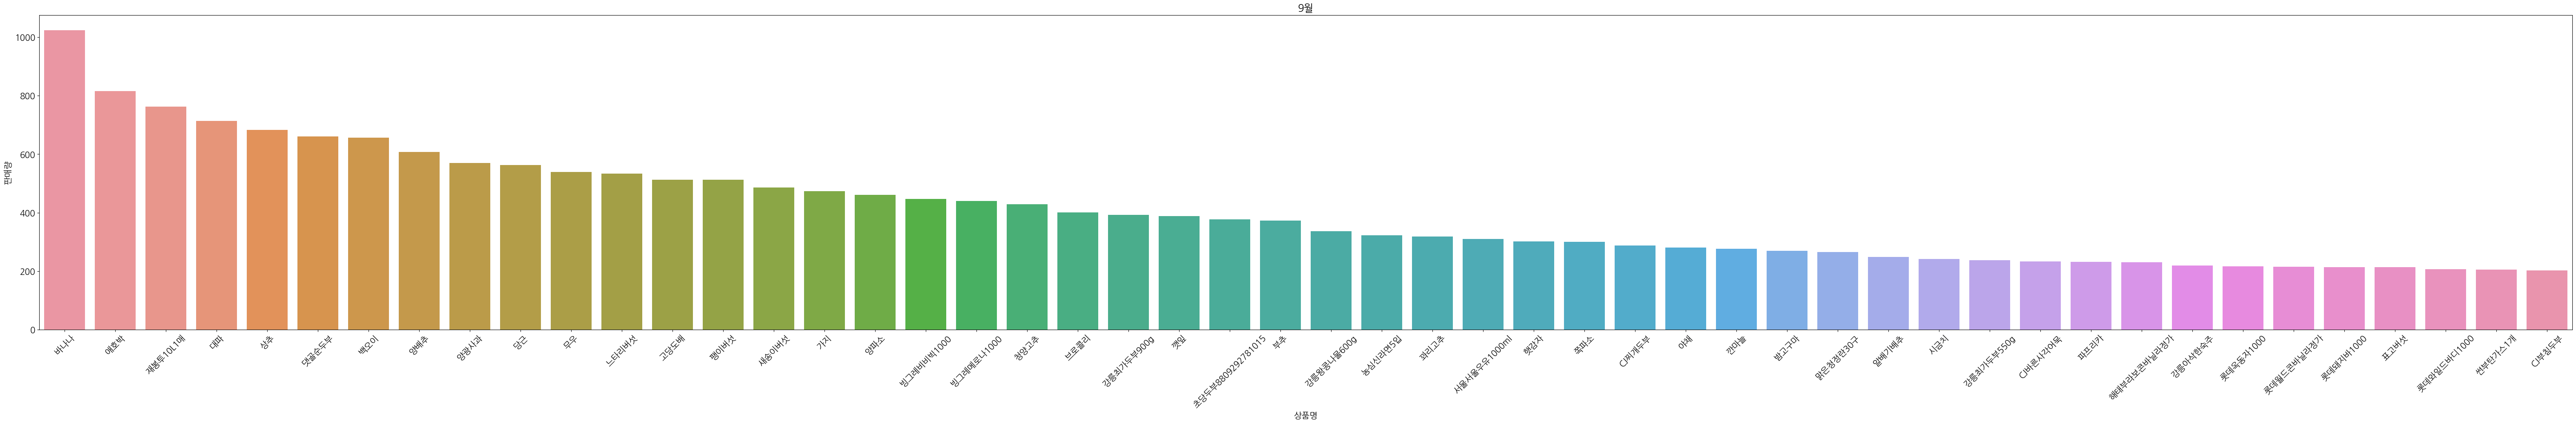

In [35]:
plt.figure(figsize=(80, 10))
plt.title('9월')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfm9_5, x='GDS_NM', y='SALE_QTY')
plt.xlabel('상품명')
plt.ylabel('판매량')
plt.show()

# Month AMT

C:\Users\min\AppData\Local\Temp\ipykernel_1164\1182236441.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


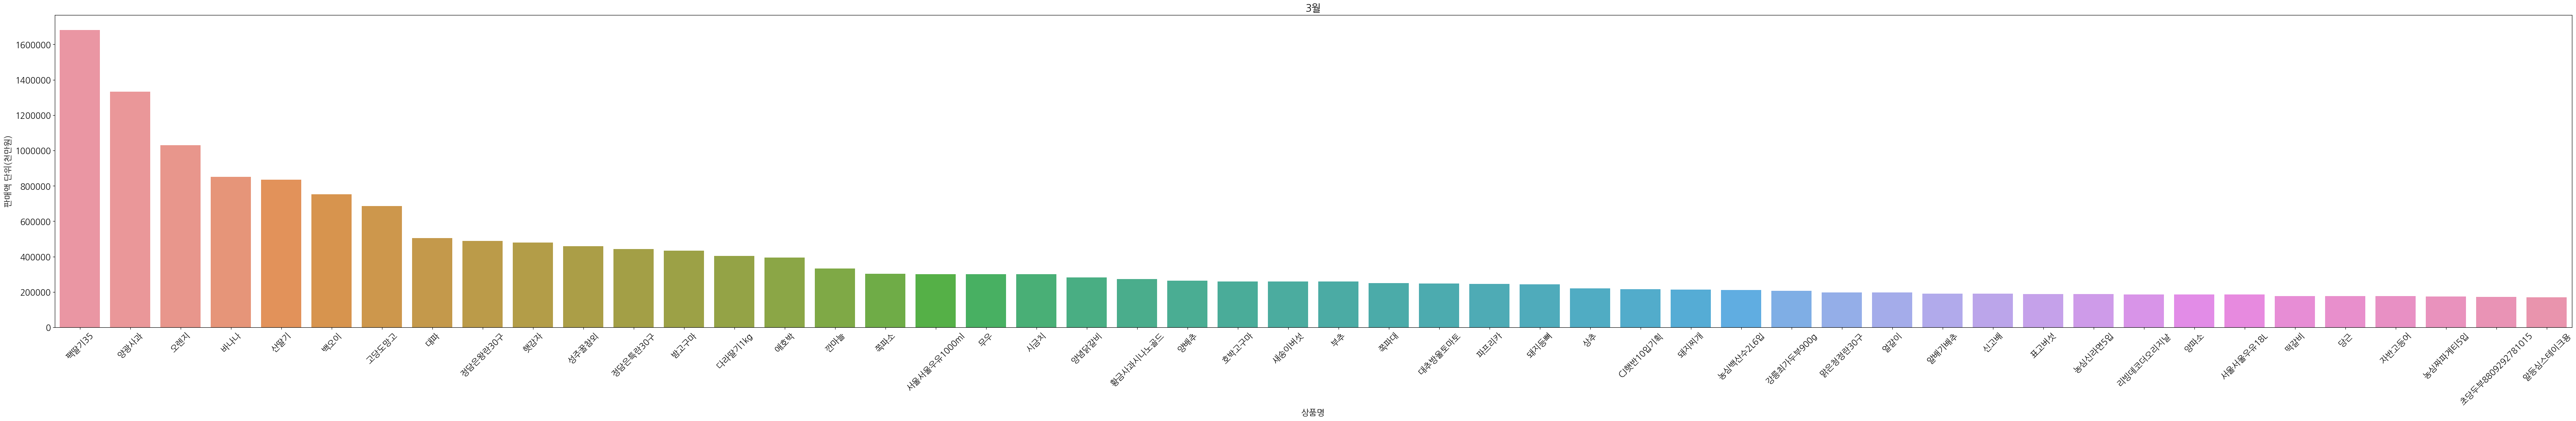

In [36]:
plt.figure(figsize=(80, 10))
plt.title('3월')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfm3_6, x='GDS_NM', y='SALE_AMT')
plt.xlabel('상품명')
plt.ylabel('판매액 단위(천만원)')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()

C:\Users\min\AppData\Local\Temp\ipykernel_1164\1744234297.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


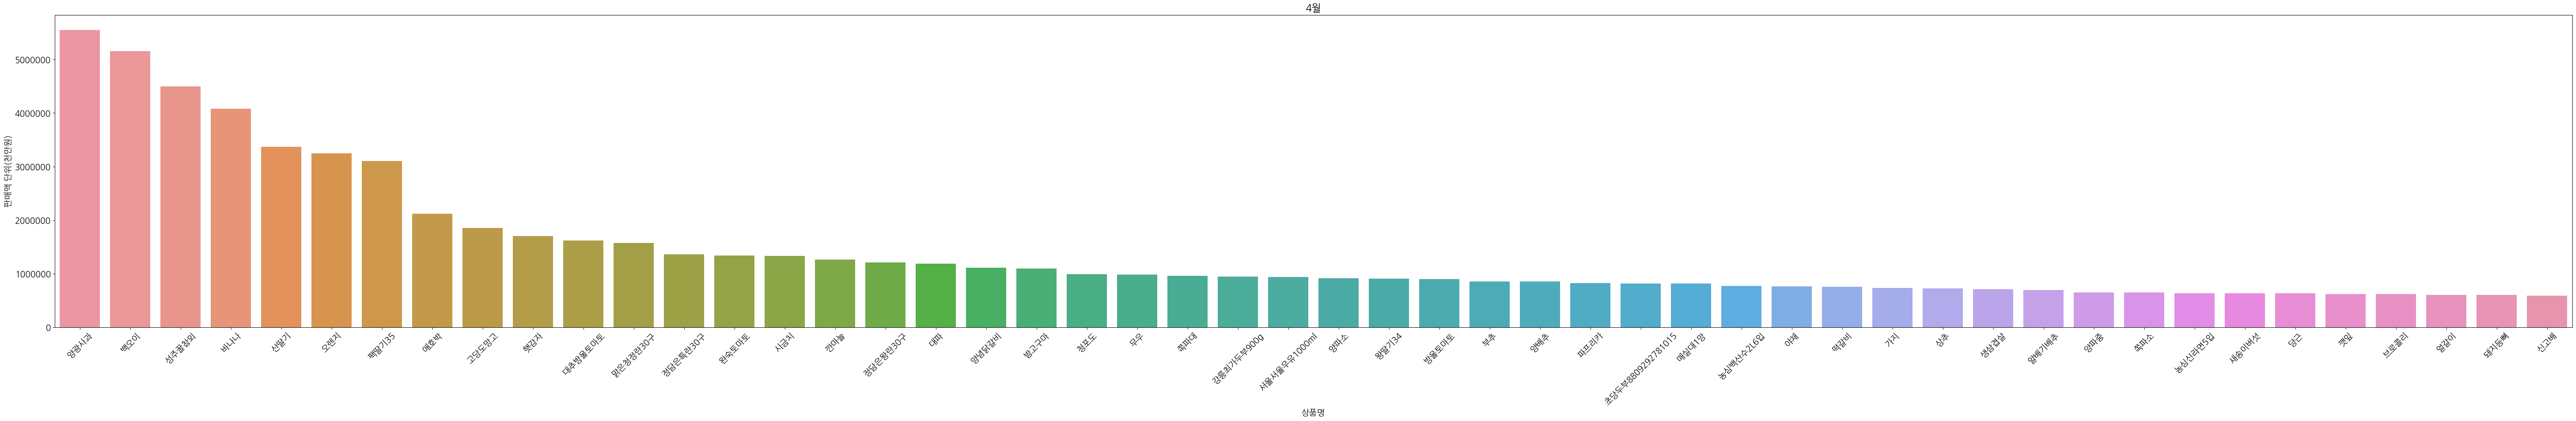

In [37]:
plt.figure(figsize=(80, 10))
plt.title('4월')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfm4_6, x='GDS_NM', y='SALE_AMT')
plt.xlabel('상품명')
plt.ylabel('판매액 단위(천만원)')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()

C:\Users\min\AppData\Local\Temp\ipykernel_1164\407345560.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


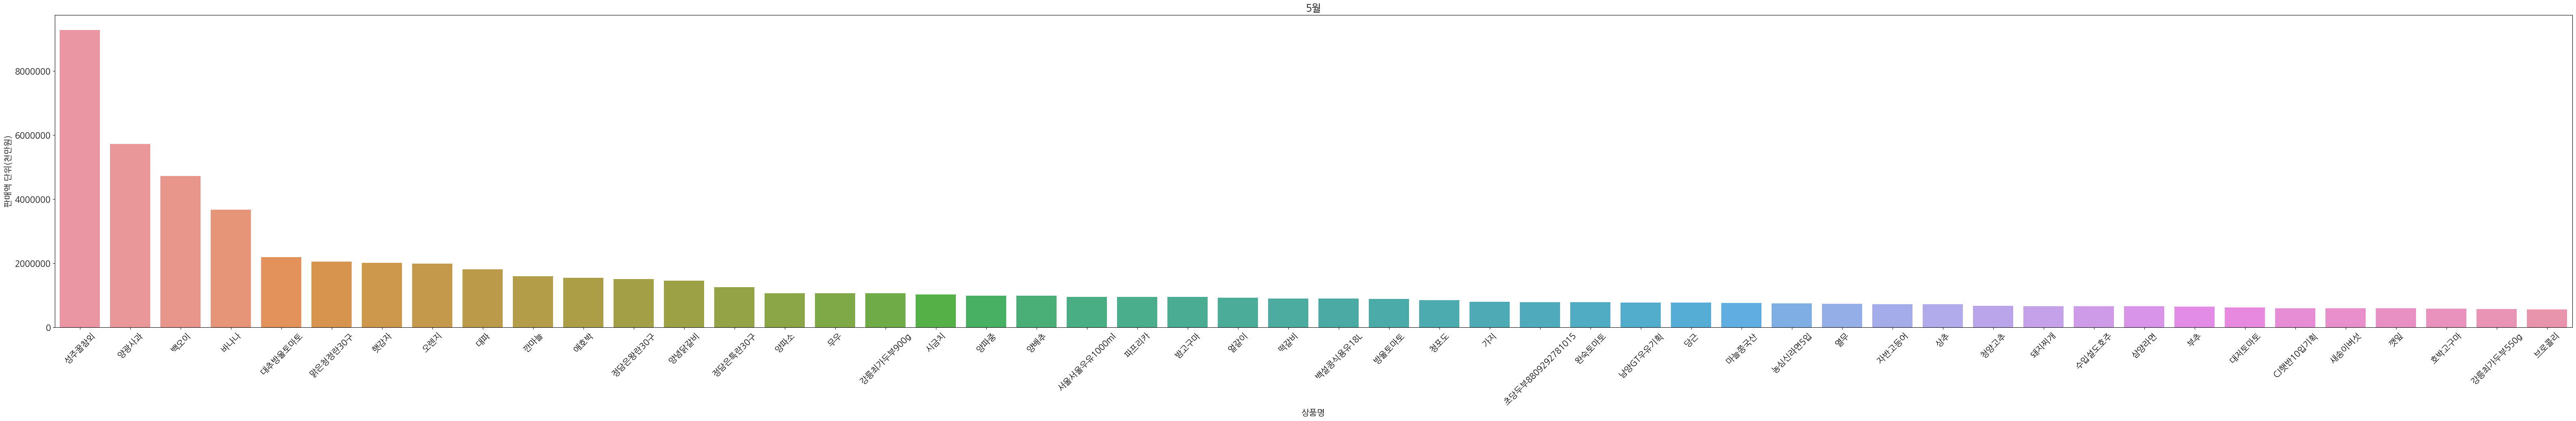

In [38]:
plt.figure(figsize=(80, 10))
plt.title('5월')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfm5_6, x='GDS_NM', y='SALE_AMT')
plt.xlabel('상품명')
plt.ylabel('판매액 단위(천만원)')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()

C:\Users\min\AppData\Local\Temp\ipykernel_1164\1418703069.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


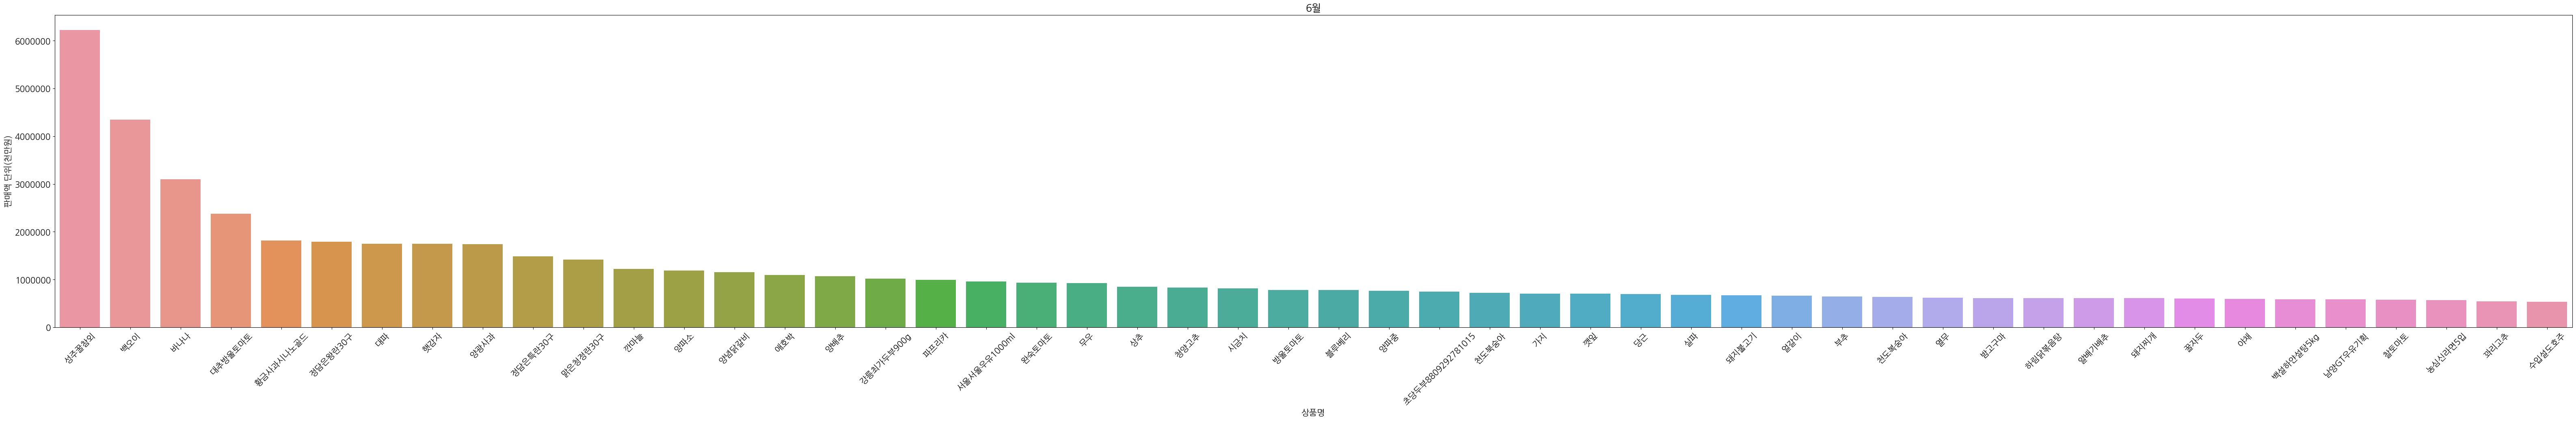

In [39]:
plt.figure(figsize=(80, 10))
plt.title('6월')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfm6_6, x='GDS_NM', y='SALE_AMT')
plt.xlabel('상품명')
plt.ylabel('판매액 단위(천만원)')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()

C:\Users\min\AppData\Local\Temp\ipykernel_1164\3506271532.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


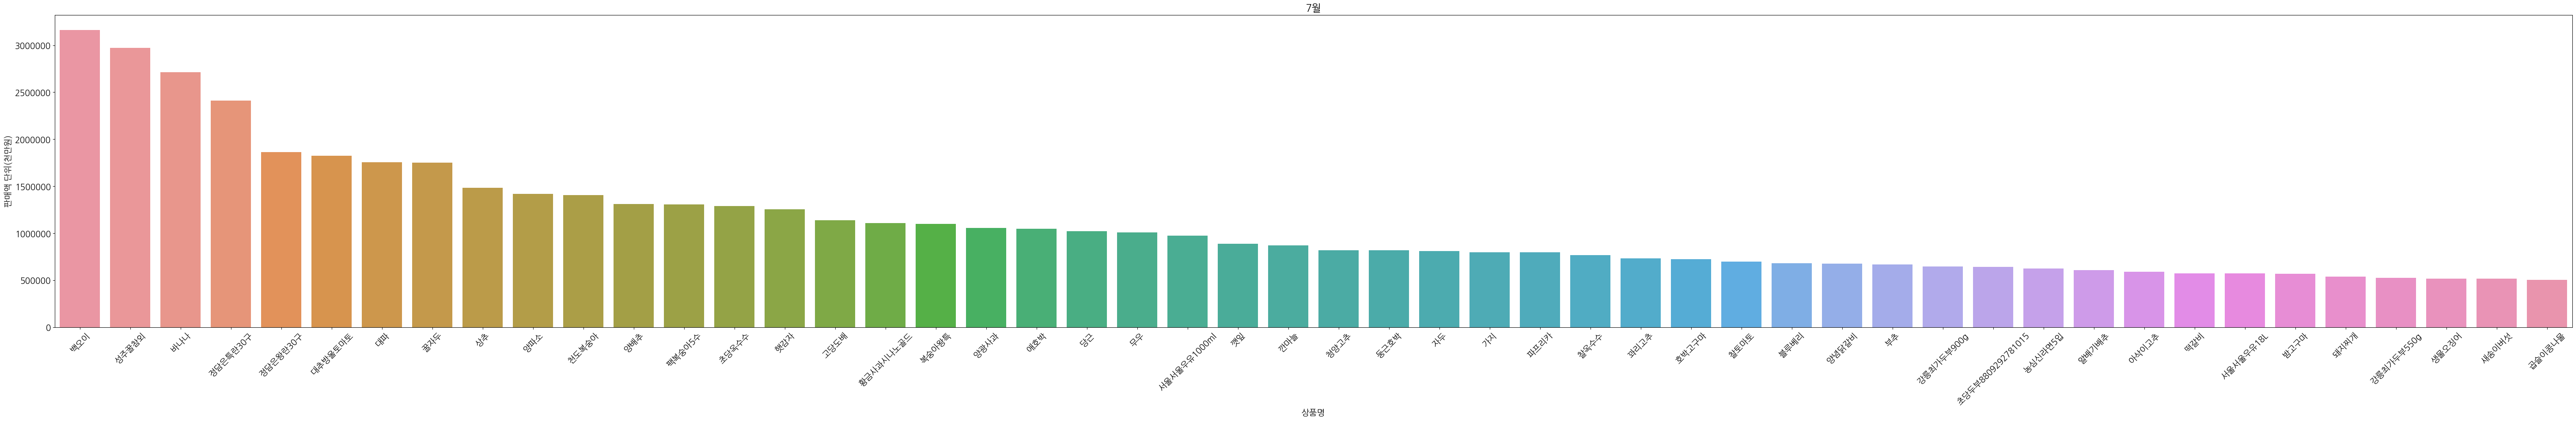

In [40]:
plt.figure(figsize=(80, 10))
plt.title('7월')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfm7_6, x='GDS_NM', y='SALE_AMT')
plt.xlabel('상품명')
plt.ylabel('판매액 단위(천만원)')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()

C:\Users\min\AppData\Local\Temp\ipykernel_1164\3927727750.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


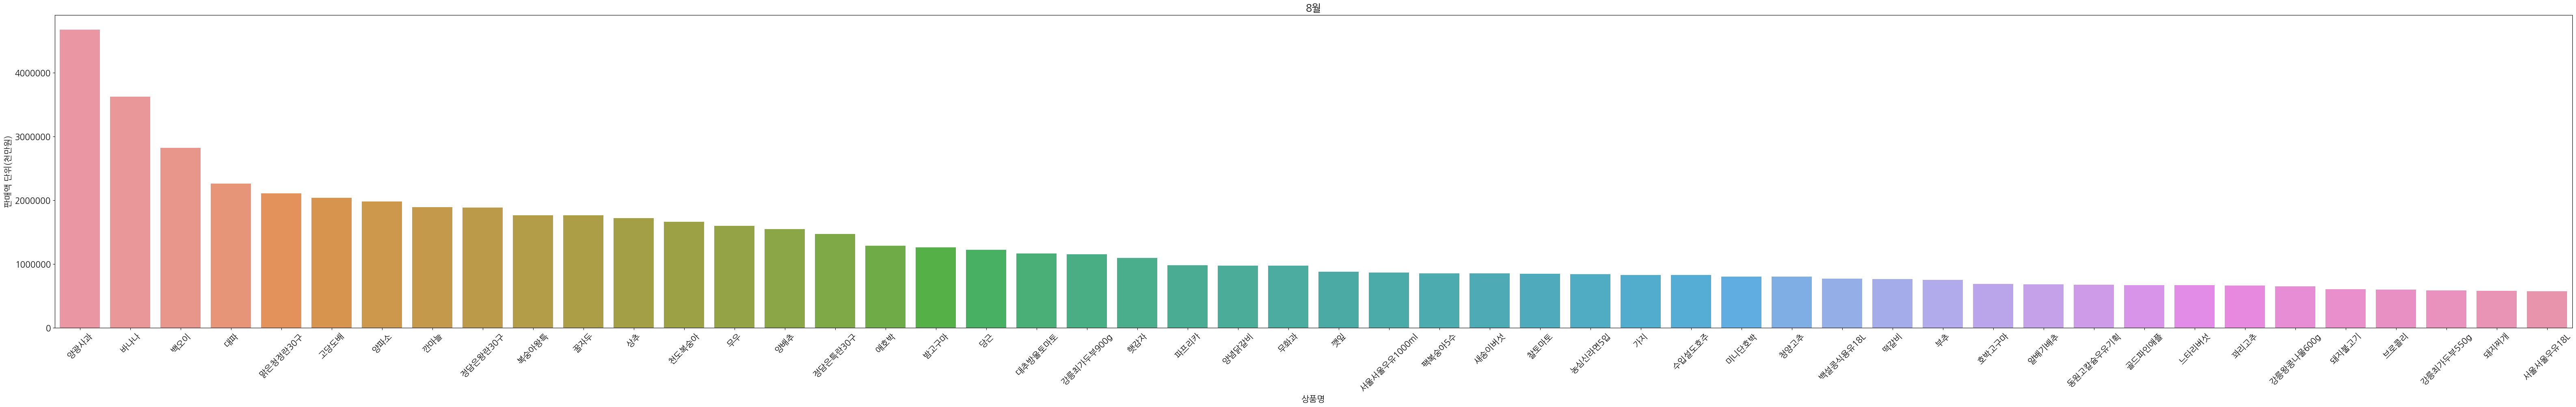

In [41]:
plt.figure(figsize=(80, 10))
plt.title('8월')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfm8_6, x='GDS_NM', y='SALE_AMT')
plt.xlabel('상품명')
plt.ylabel('판매액 단위(천만원)')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()

C:\Users\min\AppData\Local\Temp\ipykernel_1164\3910282067.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


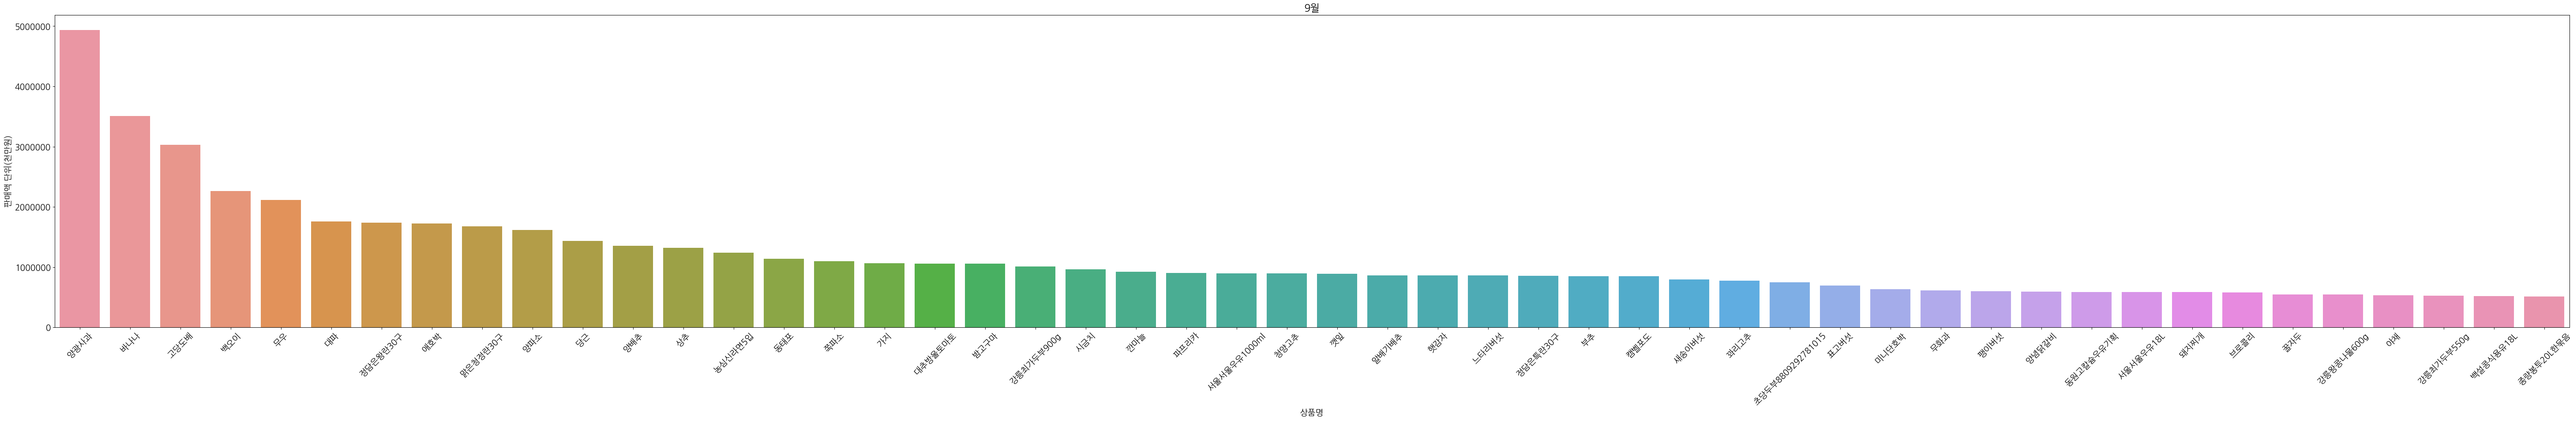

In [42]:
plt.figure(figsize=(80, 10))
plt.title('9월')
plt.rc('font', size=15)
plt.rc('figure', titlesize=200)
plt.xticks(rotation=45)
sns.barplot(data=dfm9_6, x='GDS_NM', y='SALE_AMT')
plt.xlabel('상품명')
plt.ylabel('판매액 단위(천만원)')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()